In [1]:
import numpy as np
import pandas as pd


In [2]:
#%matplotlib qt5
#%matplotlib
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#import mplfinance as mpf

In [36]:
from pyecharts import Kline, Line
from pyecharts import options as opts
import pyecharts

ImportError: cannot import name 'options'

In [4]:
from LayerModel5 import *

In [5]:
from frame import *

In [6]:
class Pattern01(PatternPair):
    
    def calChart(self):
        fd0 = self.obj_list[0].calFeatures()
        fd1 = self.obj_list[1].calFeatures()
        
        is_flag0 = self.is_flag(fd0)
        
        is_flag1 = self.is_flag(fd1)
        is_synthetic = eq(choose(fd0, 'drt'), choose(fd1, 'drt'))
        is_move = self.real_move(fd0, fd1)
        little_flag = le(choose(fd1, 'a'), 0.5)
        
        r = All([is_flag0, is_flag1, is_synthetic, is_move, little_flag])
        v = NodeVisitor()
        return v.evaluate(r)      


         

## import from mongoDB

In [ ]:


from pymongo import MongoClient, ASCENDING
mc = MongoClient()                  # Mongo连接
dbMinute30 = mc['Trade2019_Minute30']       # 数据库

symbol = '600030'
TmS = '2018-10-01 10:30'
#TmE = '2019-04-04 10:30'
monthS = 3
cl = dbMinute30[symbol]
#flt = {'month':{'$gte':monthS}}  
flt = {}
dataCursor = cl.find(flt, {'_id':0})
# sort by datetime
# to learn method of MongoDB

dt = [[d['open'], d['high'], d['low'], d['close'], d['datetime']] for d in dataCursor]
dt_df = pd.DataFrame(dt, columns= ['open','high','low','close','datetime'])


In [ ]:
dt_df.tail()

In [ ]:
dt_df.sort_values(by=['datetime'], inplace=True)
dt_df.reset_index(drop=True,inplace=True)
dt_df['TmIdx'] = dt_df.index

## ricequant csv导入

In [11]:
dt_df = pd.read_csv('data_csv\\300277-5m.csv',index_col=0,parse_dates=True)

In [12]:
dt_df['TmIdx'] = list(range(0,dt_df.shape[0]))

In [13]:
dt_df.head()

,close,total_turnover,open,volume,high,low,TmIdx
datetime,,,,,,,
2019-01-02 09:35:00,6.0464,166666.0,6.0761,26900.0,6.1452,6.0464,0
2019-01-02 09:40:00,6.0859,71003.0,6.0464,11600.0,6.0859,6.0267,1
2019-01-02 09:45:00,6.0859,54124.0,6.0662,8800.0,6.0859,6.0662,2
2019-01-02 09:50:00,6.0859,77469.0,6.0761,12600.0,6.0859,6.0662,3
2019-01-02 09:55:00,6.1156,450860.0,6.0859,73200.0,6.1255,6.0563,4


## get data list

In [14]:
dt = dt_df[['open','high','low','close','TmIdx']].values.tolist()
#idx = dt_df[['datetime','TmIdx']]
#idx['date_str'] = idx.loc[:,'datetime'].apply(lambda x:x.strftime('%m-%d %H:%M'))

In [10]:
idx.shape

NameError: name 'idx' is not defined

In [12]:
idx.head()

,datetime,TmIdx,date_str
0,2019-01-02 09:35:00,0,01-02 09:35
1,2019-01-02 09:40:00,1,01-02 09:40
2,2019-01-02 09:45:00,2,01-02 09:45
3,2019-01-02 09:50:00,3,01-02 09:50
4,2019-01-02 09:55:00,4,01-02 09:55


### Find Market Open

In [16]:
idx['internal'] = idx['datetime'].diff()

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
idx['internal'] = idx.internal.apply(lambda x :x.total_seconds())

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
idx.loc[idx.internal>61, 'mark'] = 'mkt_op'

d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
d:\Users\zhangyun29\AppData\Local\Programs\Python\Python36-64\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Get 属性数据

In [10]:
def main():
    global dt,m,ef
    layer = m.layer
    
    Event.L = [[] for i in list(range(layer+1))]
    #filepath = 'event_config.json'
    #ef = EventFactory(filepath)
    
    for k in dt[1:]:
        m.update(k)
        Stick.lv_L[-1].update(k)  
        
        # update crt Lv1 and add new Lv1
        TrendLv1.lv_L[-1].updateEndP(k)
        for i in list(range(layer)):
            if len(Event.L[i]) > 0:
                print('TmIdx:{},[{}]'.format(k[4],[x for x in Event.L[i]]))
                for event in Event.L[i][:]:
                    actions = ef.play(event)
                    for a in actions:
                        print(a)
                        if a != '':
                            eval(a)
             
    return None

In [15]:
m = Market(4)
Stick.mm = m
Trend.m = m
Pair.m = m
PairChain.m = m

In [16]:
filepath = 'event_config.json'
ef = EventFactory(filepath)

In [17]:
Stick.lv_L = m.Lv0_L
Stick('init', k_bar=dt[0])

Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))

In [18]:
TrendLv1 = type('TrendLv1', (Trend,), {'lv_L':m.Lv1_L, 'ML':Stick.lv_L, 'level':1}) 
TrendLv1('init', k_bar=dt[0], mp=[0])
TrendLv2 = type('TrendLv2', (Trend,), {'lv_L':m.Lv2_L, 'ML':TrendLv1.lv_L, 'level':2}) 
TrendLv2('init', k_bar=dt[0], mp=[0])
TrendLv3 = type('TrendLv3', (Trend,), {'lv_L':m.Lv3_L, 'ML':TrendLv2.lv_L, 'level':3}) 
TrendLv3('init', k_bar=dt[0], mp=[0])

Trend3(0, 0, Point(0.0, 6.0761, 0))

In [19]:
PairLv0 = type('PairLv0', (Pair,), {'ML': m.findList('st', 0), 'L': m.findList('pair', 0), 'level': 0})
PairLv0(0)
PairLv1 = type('PairLv1', (Pair,), {'ML': m.findList('st', 1), 'L': m.findList('pair', 1), 'level': 1})
PairLv1(0)
PairLv2 = type('PairLv2', (Pair,), {'ML': m.findList('st', 2), 'L': m.findList('pair', 2), 'level': 2})
PairLv2(0)
PairLv3 = type('PairLv3', (Pair,), {'ML': m.findList('st', 3), 'L': m.findList('pair', 3), 'level': 3})
PairLv3(0)
PairChainLv0 = PairChain(0, 'PairChainLv0')
PairChainLv0.regSignal()
PairChainLv1 = PairChain(1,'PairChainLv1')
PairChainLv1.regSignal()
PairChainLv2 = PairChain(2, 'PairChainLv2')
PairChainLv2.regSignal()
PairChainLv3 = PairChain(3, 'PairChainLv3')


In [20]:
class Pattern01Lv0(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 0))
        self.L.append(self)
        self.level = 0
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 0))
        self.cursor = cursor
        self.changeW(2)      


In [21]:
class Pattern01Lv1(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 1))
        self.L.append(self)
        self.level = 1
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 1))
        self.cursor = cursor
        self.changeW(2)      

In [22]:
class Pattern01Lv2(Pattern01):
    def __init__(self,cursor):   
        super().__init__()
        self.changeL(m.findList('pattern01', 2))
        self.L.append(self)
        self.level = 2
        self.chain_layer = cursor[0]
        self.changeML(m.findList('pairchain', 2))
        self.cursor = cursor
        self.changeW(2)      

In [23]:
PatternPair.m = m
Pattern01Lv0([0,0])
Pattern01Lv0([1,0])
Pattern01Lv0([2,0])
m.PT01Lv0_L[0].regAction()
Pattern01Lv1([0,0])
Pattern01Lv1([1,0])
Pattern01Lv1([2,0])
m.PT01Lv1_L[0].regAction()
Pattern01Lv2([0,0])
Pattern01Lv2([1,0])
Pattern01Lv2([2,0])
m.PT01Lv2_L[0].regAction()

In [24]:
m.__dict__

{'layer': 4,
 'TmIdx': 0,
 'obj_list': {'st': [[Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))],
   [Trend1(0, 0, Point(0.0, 6.0761, 0))],
   [Trend2(0, 0, Point(0.0, 6.0761, 0))],
   [Trend3(0, 0, Point(0.0, 6.0761, 0))],
   []],
  'pair': [[Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   [Pair-1(TmS:0.0, 0, [0])],
   []],
  'pairchain': [[<LayerModel5.PairChain at 0x194bb240>],
   []],
  'mergedpair': [[], [], [], [], []],
  'pattern01': [[<__main__.Pattern01Lv0 at 0x1b13aa58>,
   [],
   []]},
 'Lv0_L': [Stick(drt:0, lv:0, Point(0.0, 6.0761, 0))],
 'PLv0_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv0_L': [<LayerModel5.PairChain at 0x194bb240>],
 'MPLv0_L': [],
 'PT01Lv0_L': [<__main__.Pattern01Lv0 at 0x1b13aa58>,
 'Lv1_L': [Trend1(0, 0, Point(0.0, 6.0761, 0))],
 'PLv1_L': [Pair-1(TmS:0.0, 0, [0])],
 'PCLv1_L': [<LayerModel5.PairChain at 0x1b13e7f0>],
 'MPLv1_L': [],
 'PT01Lv1_L': [<__main__.Pattern01Lv1 at 0x1b13ac88>,
 'Lv2_L': [Trend2(0, 0, Point(0.0, 6.

In [25]:
ef.event_config

[{'level': 0,
  'Stick': {'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv1_L[-1]', 'm.PCLv0_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv0_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv1_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv0_L'],
    'param': ['m.PLv0_L[-1]']}},
  'PairChainLv0': {'NEW': {'method': ['updateAll'],
    'obj_p': ['Pattern01Lv0'],
    'param': ['']}}},
 {'level': 1,
  'TrendLv1': {'NEW': {'method': ['update2', 'update2'],
    'obj_p': ['m.Lv2_L[-1]', 'm.PCLv1_L[0]'],
    'param': ['', '']},
   'PEAK': {'method': ['updateLastSt'],
    'obj_p': ['m.PCLv1_L[0]'],
    'param': ['']},
   'LVUPD': {'method': ['updatePeakP'],
    'obj_p': ['m.Lv2_L[-1]'],
    'param': ['k_bar=m.dt[-1]']}},
  'Pair': {'NEW': {'method': ['updateAll'],
    'obj_p': ['m.PT01Lv1_L'],
    'param': ['m.PLv1_L[-1]']}},
  'PairCha

In [26]:
Position.m = m
Position.L = m.position

In [27]:
main()

TmIdx:12.0,[[<frame.Event object at 0x000000001B13A048>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:21.0,[[<frame.Event object at 0x00000000194BB8D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0]
Lv1.update2(): flag:0, treated.status:0,treaded.drt:1,treated.mp:[0, 1]
m.PCLv0_L[0].update2()
TmIdx:22.0,[[<frame.Event object at 0x000000001B13A080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 0],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 0],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 0],layer_chain:2,w:2
TmIdx:29.0,[[<frame.Event object at 0x00000000194BB2B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[0, 1]
Lv1.update1st:status=0,mp:3,(0.0, 6.0761, 0),(10.0, 6.1847, -1),(29.0, 6.1452, -1),[StdK(10.0, 6.1847, 6.1255, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (19.0, 6.1255, 1))

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[23, 24, 25, 26, 27, 28, 29]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (316.0, 6.1057, 1)),peak(315.0, 6.1156, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[23, 24, 25, 26, 27, 28, 29, 30]
m.PCLv0_L[0].update2()
TmIdx:325.0,[[<frame.Event object at 0x000000001B17F3C8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 4],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
TmIdx:329.0,[[<frame.Event object at 0x000000001B17F748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:330.0,[[<frame.Event object at 0x000000001B17F940>]]
(0, Stick, LVUPD)
m.Lv1_L

test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 16],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 12],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:508.0,[[<frame.Event object at 0x0000000019B43128>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:511.0,[[<frame.Event object at 0x0000000019B43AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:512.0,[[<frame.Event object at 0x0000000019B431D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:516.0,[[<frame.Event object at 0x0000000019B4C0B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[42, 43, 44, 45, 46, 47]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[42, 43, 44, 45, 46, 47, 48]
m.PCLv0_L[0].update2()
TmIdx:516.0,[[<frame.Event object at 0x0000000019B431D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].u

test:PP.cursor()__start_cursor:[0, 19],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 25],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 26],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 17],layer_chain:2,w:2
TmIdx:767.0,[[<frame.Event object at 0x0000000019B61AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:768.0,[[<frame.Event object at 0x0000000019B61630>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:769.0,[[<frame.Event object at 0x0000000019B610B8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:782.0,[[<frame.Event object at 0x0000000019B61320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:783.0,[[<frame.Event object at 0x0000000019B61908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:787.0,[[<frame.Event object at 0x0000000019B61E10>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:790.0,[[<frame.Event object at 0x0000000019B619B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag

TmIdx:887.0,[[<frame.Event object at 0x0000000019B67E10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:888.0,[[<frame.Event object at 0x0000000019B67F98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:889.0,[[<frame.Event object at 0x0000000019B67F60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:890.0,[[<frame.Event object at 0x0000000019B67E10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:892.0,[[<frame.Event object at 0x0000000019B628D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:895.0,[[<frame.Event object at 0x0000000019B62710>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:896.0,[[<frame.Event object at 0x0000000019B62748>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:899.0,[[<frame.Event object at 0x0000000019B62630>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:900.0,[[<frame.Event object at 0x0000000019B625F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:902.0,[[<frame.Event object at 0

test:PP.cursor()__start_cursor:[1, 33],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 22],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 23],layer_chain:2,w:2
TmIdx:1088.0,[[<frame.Event object at 0x0000000019B6D940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[88, 89, 90, 91, 92]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1073.0, 5.6907, -1)),peak(1064.0, 5.8785, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[88, 89, 90, 91, 92, 93]
m.PCLv0_L[0].update2()
TmIdx:1095.0,[[<frame.Event object at 0x0000000019B6DE10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[88, 89, 90, 91, 92, 93]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[88, 89, 90, 91, 92, 93, 94]
m.PCLv0_L[0].update2()
TmIdx:1105.0,[[<frame.Event object at 0x0000000019B6D710>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0

TmIdx:1298.0,[[<frame.Event object at 0x0000000019B8CC18>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[18, 19, 20, 21, 22, 23]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[18, 19, 20, 21, 22, 23, 24]
m.PCLv1_L[0].update2()
TmIdx:1299.0,[[<frame.Event object at 0x0000000019B8B550>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 26],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 28],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
TmIdx:1303.0,[[<frame.Event object at 0x0000000019B8B518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1307.0,[[<frame.Event object at 0x0000000019B8B080>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1321.0,[[<frame.Event

test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:1422.0,[[<frame.Event object at 0x0000000019B99240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[129, 130, 131, 132]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[129, 130, 131, 132, 133]
m.PCLv0_L[0].update2()
TmIdx:1422.0,[[<frame.Event object at 0x0000000019B992B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1423.0,[[<frame.Event object at 0x0000000019B99E48>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 30],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 31],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 41],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 42],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 33],layer_chain:2,w:2
TmIdx:1427.0,[[<frame.Event object at 0x0000000019B99FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.sta

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1561.0,[[<frame.Event object at 0x0000000019BA83C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[143, 144, 145, 146, 147, 148]
Lv1.upd1st():case1, status:1, mp:[143, 144, 145, 146, 147, 148, 149],pp:3
Lv1.produceNewTrend:case1, mp=[146, 147, 148, 149]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1537.0, 6.3626, -1)),peak(1540.0, 6.2835, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1541.0, 6.2539, 1)),peak(1537.0, 6.3626, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1549.0, 6.5799, -1)),peak(1537.0, 6.3626, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp:[146, 147, 148, 149]
m.PCLv0_L[0].update2()
TmIdx:1561.0,[[<frame.Event object at 0x0000000019BA86A0>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: fla

Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[166, 167, 168, 169, 170, 171, 172]
m.PCLv0_L[0].update2()
TmIdx:1790.0,[[<frame.Event object at 0x0000000019BA8320>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1793.0,[[<frame.Event object at 0x0000000019B9FF98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:1795.0,[[<frame.Event object at 0x0000000019B9FDA0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1802.0,[[<frame.Event object at 0x0000000019BC15F8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[166, 167, 168, 169, 170, 171, 172]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (1793.0, 6.7676, -1)),peak(1776.0, 6.8467, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[166, 167, 168, 169, 170, 171, 172, 173]
m.PCLv0_L[0].update2()
TmIdx:1803.0,[[<frame.Event object at 0x0000000019BC1240>]]
(0, PairChainLv0, NEW)
Pattern01Lv

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194]
m.PCLv0_L[0].update2()
TmIdx:1955.0,[[<frame.Event object at 0x0000000019BDEDA0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:1956.0,[[<frame.Event object at 0x0000000019BDE2B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 44],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 45],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 60],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 50],layer_chain:2,w:2
TmIdx:1958.0,[[<frame.Event object at 0x0000000019BDEA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[182, 183, 184, 185, 186, 187, 188, 1

Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[212, 213, 214, 215]
m.PCLv0_L[0].update2()
TmIdx:2176.0,[[<frame.Event object at 0x0000000019BE6CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[212, 213, 214, 215]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[212, 213, 214, 215, 216]
m.PCLv0_L[0].update2()
TmIdx:2177.0,[[<frame.Event object at 0x0000000019BA3080>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 53],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 66],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 67],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 53],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 54],layer_chain:2,w:2
TmIdx:2181.0,[[<frame.Event object at 0x0000000019BA3668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated

test:PP.cursor()__start_cursor:[0, 55],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
TmIdx:2327.0,[[<frame.Event object at 0x0000000019BDDE48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[229, 230, 231, 232, 233, 234]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[229, 230, 231, 232, 233, 234, 235]
m.PCLv0_L[0].update2()
TmIdx:2327.0,[[<frame.Event object at 0x0000000019BDD470>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:2328.0,[[<frame.Event object at 0x0000000019BDDDA0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 55],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 56],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 72],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
TmId

TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (2492.0, 7.8149, -1)),peak(2464.0, 7.8643, -1),drt:1
Lv2.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[48, 49, 50, 51, 52, 53]
m.PCLv1_L[0].update2()
TmIdx:2519.0,[[<frame.Event object at 0x0000000019C015C0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 60],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 77],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 78],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 68],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
TmIdx:2519.0,[[<frame.Event object at 0x0000000019C016A0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 11],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 12],layer_chain

test:PP.cursor()__start_cursor:[1, 83],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 76],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 77],layer_chain:2,w:2
TmIdx:2731.0,[[<frame.Event object at 0x0000000019C16198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[279, 280, 281, 282, 283]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (2725.0, 7.1628, 1)),peak(2716.0, 7.1925, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[279, 280, 281, 282, 283, 284]
m.PCLv0_L[0].update2()
m.position[3].open_position(m.dt[-1])
TmIdx:2738.0,[[<frame.Event object at 0x0000000019C16E80>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[279, 280, 281, 282, 283, 284]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[279, 280, 281, 282, 283, 284, 285]
m.PCLv0_L[0].update2()
TmIdx:2738.0,[[<f

(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[306, 307, 308, 309, 310]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (2923.0, 8.0125, -1)),peak(2904.0, 7.9236, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[306, 307, 308, 309, 310, 311]
m.PCLv0_L[0].update2()
m.position[6].open_position(m.dt[-1])
TmIdx:2933.0,[[<frame.Event object at 0x0000000019C36A20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 73],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 74],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 90],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_chain:2,w:2
TmIdx:2934.0,[[<frame.Event object at 0x0000000019C36BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2936.0,[[<frame.Event object at 0x0000000019C363C8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])

test:PP.cursor()__start_cursor:[0, 76],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 91],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 92],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 82],layer_chain:2,w:2
TmIdx:2991.0,[[<frame.Event object at 0x0000000019C3A048>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 12],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 13],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 13],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 14],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 10],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:2996.0,[[<frame.Event object at 0x0000000019C35E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2997.0,[[<frame.Event object at 0x0000000019C35A90>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:2998.0,[[<frame.Event object at 0x0000000019C3571

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3094.0,[[<frame.Event object at 0x0000000019C43CF8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3098.0,[[<frame.Event object at 0x0000000019C43FD0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[325, 326, 327, 328, 329, 330]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[325, 326, 327, 328, 329, 330, 331]
m.PCLv0_L[0].update2()
TmIdx:3098.0,[[<frame.Event object at 0x0000000019C43A90>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3103.0,[[<frame.Event object at 0x0000000019C3F0B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[325, 326, 327, 328, 329, 330, 331]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (3097.0, 7.6469, 1)),peak(3079.0, 7.558, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[325, 326, 327, 328, 329, 330, 33

TmIdx:3303.0,[[<frame.Event object at 0x0000000019C60F60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3304.0,[[<frame.Event object at 0x0000000019C60D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3307.0,[[<frame.Event object at 0x0000000019C60DD8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3310.0,[[<frame.Event object at 0x0000000019C60978>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3311.0,[[<frame.Event object at 0x0000000019C60AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3312.0,[[<frame.Event object at 0x0000000019C609E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3315.0,[[<frame.Event object at 0x0000000019C60C50>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3316.0,[[<frame.Event object at 0x0000000019C60EB8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3317.0,[[<frame.Event object at 0x0000000019C60F98>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3325.0,[[<frame.Event o

(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3504.0,[[<frame.Event object at 0x0000000019C76518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3505.0,[[<frame.Event object at 0x0000000019C766D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3506.0,[[<frame.Event object at 0x0000000019C76A58>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3510.0,[[<frame.Event object at 0x0000000019C76748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3517.0,[[<frame.Event object at 0x0000000019C76668>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3518.0,[[<frame.Event object at 0x0000000019C76898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3519.0,[[<frame.Event object at 0x0000000019C766D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:3522.0,[[<frame.Event object at 0x0000000019C76160>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3525.0,[[<frame.Event object at 0x0000000019C76208>]]
(0, Stick, NEW)


test:PP.cursor()__start_cursor:[0, 5],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 2],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 3],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 1],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 2],layer_chain:2,w:2
TmIdx:3664.0,[[<frame.Event object at 0x0000000019C7EDA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[385, 386]
Lv1.update1st:status=0,mp:3,(3600.0, 7.5778, -1),(3614.0, 7.5481, -1),(3664.0, 7.2518, 1),[StdK(3648.0, 7.2715, 6.9652, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (3653.0, 7.2715, -1)),peak(3614.0, 7.5481, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[385, 386, 387]
m.PCLv0_L[0].update2()
TmIdx:3664.0,[[<frame.Event object at 0x0000000019C7E5C0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3665.0,[[<frame.Event object at 0x0000000019C7ED30>]]
(0, PairChainLv0, NEW)
Pa

test:PP.cursor()__start_cursor:[0, 91],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 115],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 116],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 104],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 105],layer_chain:2,w:2
TmIdx:3828.0,[[<frame.Event object at 0x0000000019C979E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409]
m.PCLv0_L[0].update2()
m.position[8].open_position(m.dt[-1])
TmIdx:3828.0,[[<frame.Event object at 0x0000000019C974E0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:3829.0,[[<frame.Event object at 0x0000000019C976A0>, <frame.Event object at 0x0000000019C97E48>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_curso

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4069.0,[[<frame.Event object at 0x0000000019CB2FD0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 101],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 102],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 122],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 123],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 107],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 108],layer_chain:2,w:2
TmIdx:4081.0,[[<frame.Event object at 0x0000000019CB2EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4067.0, 7.0443, -1)),peak(4054.0, 7.1332, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437]
m.PCLv0_

test:PP.cursor()__start_cursor:[2, 18],layer_chain:2,w:2
TmIdx:4220.0,[[<frame.Event object at 0x0000000019CC1EB8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458]
m.PCLv0_L[0].update2()
TmIdx:4220.0,[[<frame.Event object at 0x0000000019CC1EF0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4225.0,[[<frame.Event object at 0x0000000019CBD080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (4218.0, 6.9652, -1)),peak(4207.0, 6.985, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[446, 447, 448, 449, 450, 451, 452, 453, 454, 455

TmIdx:4389.0,[[<frame.Event object at 0x0000000019CDF4A8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[478, 479]
Lv1.update1st:status=0,mp:3,(4366.0, 6.7874, 1),(4375.0, 7.0166, 1),(4389.0, 6.9469, -1),[StdK(4373.0, 7.0964, 6.897, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4383.0, 6.897, 1)),peak(4375.0, 7.0166, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[478, 479, 480]
m.PCLv0_L[0].update2()
TmIdx:4389.0,[[<frame.Event object at 0x0000000019CDF518>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4390.0,[[<frame.Event object at 0x0000000019CDF278>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 109],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 110],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 131],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 132],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[

test:PP.cursor()__start_cursor:[0, 115],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 139],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 140],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 128],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 129],layer_chain:2,w:2
TmIdx:4643.0,[[<frame.Event object at 0x0000000019CF6F60>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[505, 506, 507, 508, 509]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (4639.0, 7.495, 1)),peak(4626.0, 7.206, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[505, 506, 507, 508, 509, 510]
m.PCLv0_L[0].update2()
TmIdx:4646.0,[[<frame.Event object at 0x0000000019CFE780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[505, 506, 507, 508, 509, 510]
Lv1.upd1st():case1, status:1, mp:[505, 506, 507, 508, 509, 510, 511],pp:3
Lv1.produceNewTrend:case1, mp=[508,

test:PP.cursor()__start_cursor:[2, 20],layer_chain:2,w:2
TmIdx:4762.0,[[<frame.Event object at 0x0000000019D0C400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[521, 522, 523, 524]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[521, 522, 523, 524, 525]
m.PCLv0_L[0].update2()
TmIdx:4762.0,[[<frame.Event object at 0x0000000019D0C9B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4763.0,[[<frame.Event object at 0x0000000019D0C2B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 119],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 120],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 145],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 146],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 133],layer_chain:2,w:2
TmIdx:4766.0,[[<frame.Event object at 0x0000000019D0CDD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treate

test:PP.cursor()__start_cursor:[0, 130],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 153],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 139],layer_chain:2,w:2
TmIdx:4961.0,[[<frame.Event object at 0x0000000019D30048>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555]
m.PCLv0_L[0].update2()
TmIdx:4961.0,[[<frame.Event object at 0x0000000019D300B8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:4962.0,[[<frame.Event object at 0x0000000019D30898>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 130],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 131],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 153],layer_chain:1,w:2
test:PP.curs

test:PP.cursor()__start_cursor:[0, 138],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 160],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 161],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 142],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 143],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:5150.0,[[<frame.Event object at 0x0000000019D3F2B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5166.0,[[<frame.Event object at 0x0000000019D3F978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[572, 573, 574, 575, 576, 577, 578]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5148.0, 6.897, -1)),peak(5130.0, 6.897, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[572, 573, 574, 575, 576, 577, 578, 579]
m.PCLv0_L[0].update2()
TmIdx:5167.0,[[<frame.Event object at 0x0000000019D313C8>, <frame.Event object at 0x0000000019D3F9E8>]]
(0, Pai

TmIdx:5362.0,[[<frame.Event object at 0x0000000019D5C9B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 140],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 141],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 167],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 168],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 148],layer_chain:2,w:2
TmIdx:5364.0,[[<frame.Event object at 0x0000000019D5CBE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[594, 595]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[594, 595, 596]
m.PCLv0_L[0].update2()
TmIdx:5365.0,[[<frame.Event object at 0x0000000019D5CC50>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 141],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 142],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 167],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 168],layer_chai

test:PP.cursor()__start_cursor:[1, 176],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 152],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 153],layer_chain:2,w:2
TmIdx:5587.0,[[<frame.Event object at 0x0000000019D6FB70>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (5573.0, 7.0067, -1)),peak(5482.0, 7.216, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617]
m.PCLv0_L[0].update2()
TmIdx:5588.0,[[<frame.Event object at 0x0000000019D69048>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 175],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 176],layer_chain:1,w:2
test:PP.c

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[637, 638, 639, 640, 641, 642]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[637, 638, 639, 640, 641, 642, 643]
m.PCLv0_L[0].update2()
TmIdx:5796.0,[[<frame.Event object at 0x0000000019D84630>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:5797.0,[[<frame.Event object at 0x0000000019D90160>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 146],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 180],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 181],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 161],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 162],layer_chain:2,w:2
TmIdx:5801.0,[[<frame.Event object at 0x0000000019D906D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[637, 638, 639, 640, 641, 642, 64

test:PP.cursor()__start_cursor:[0, 147],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 187],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 188],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 165],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 166],layer_chain:2,w:2
TmIdx:5945.0,[[<frame.Event object at 0x0000000019D94B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[651, 652, 653, 654, 655, 656, 657]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (5938.0, 6.5283, 1)),peak(5916.0, 6.608, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[651, 652, 653, 654, 655, 656, 657, 658]
m.PCLv0_L[0].update2()
m.position[22].open_position(m.dt[-1])
TmIdx:5946.0,[[<frame.Event object at 0x0000000019D94A90>, <frame.Event object at 0x0000000019D94860>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 14

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6261.0,[[<frame.Event object at 0x0000000019DB33C8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 27],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 28],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 30],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 26],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 27],layer_chain:2,w:2
TmIdx:6270.0,[[<frame.Event object at 0x0000000019DA2C18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6272.0,[[<frame.Event object at 0x0000000019DB3898>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6273.0,[[<frame.Event object at 0x0000000019DB3080>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6277.0,[[<frame.Event object at 0x0000000019DB3588>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6281.0,[[<frame.Event object at 0x0000000019DB3AC8>]]
(0, Stick, N

test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 8],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 7],layer_chain:2,w:2
TmIdx:6448.0,[[<frame.Event object at 0x0000000019DB8CC0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[704, 705, 706, 707, 708, 709]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[704, 705, 706, 707, 708, 709, 710]
m.PCLv0_L[0].update2()
TmIdx:6448.0,[[<frame.Event object at 0x0000000019DC2080>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6450.0,[[<frame.Event object at 0x0000000019DB86D8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6453.0,[[<frame.Event object at 0x0000000019DB8400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:6456.0,[[<frame.Event object at 0x0000000019DB8EB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:6467.0,[[<f

test:PP.cursor()__start_cursor:[1, 31],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 28],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 29],layer_chain:2,w:2
TmIdx:6646.0,[[<frame.Event object at 0x0000000019DD6240>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[730, 731, 732, 733]
Lv1.upd1st():case1, status:1, mp:[730, 731, 732, 733, 734],pp:1
Lv1.produceNewTrend:case1, mp=[731, 732, 733, 734]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6616.0, 6.8273, 1)),peak(6617.0, 6.8671, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (6621.0, 6.8771, -1)),peak(6616.0, 6.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6624.0, 6.7774, 1)),peak(6616.0, 6.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[731, 732, 733, 734]
m.PCLv0_L[0].update2()
TmIdx:6646.0,[[<frame.Event obj

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[757, 758, 759, 760]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[757, 758, 759, 760, 761]
m.PCLv0_L[0].update2()
TmIdx:6944.0,[[<frame.Event object at 0x0000000019DF75C0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[757, 758, 759, 760, 761]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (6934.0, 6.4685, 1)),peak(6923.0, 6.3588, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[757, 758, 759, 760, 761, 762]
m.PCLv0_L[0].update2()
TmIdx:6945.0,[[<frame.Event object at 0x0000000019DF74E0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 162],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 219],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 220],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 193],layer_chai

test:PP.cursor()__start_cursor:[1, 32],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 32],layer_chain:2,w:2
TmIdx:7051.0,[[<frame.Event object at 0x0000000019DF2B00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7056.0,[[<frame.Event object at 0x0000000019DF28D0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7062.0,[[<frame.Event object at 0x0000000019DF2C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[766, 767, 768, 769, 770, 771]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[766, 767, 768, 769, 770, 771, 772]
m.PCLv0_L[0].update2()
TmIdx:7062.0,[[<frame.Event object at 0x0000000019DF28D0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7063.0,[[<frame.Event object at 0x0000000019DF2A20>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 162],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.

TmIdx:7229.0,[[<frame.Event object at 0x0000000019E05630>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[782, 783]
Lv1.update1st:status=0,mp:3,(7171.0, 6.3289, 1),(7183.0, 6.3389, 1),(7229.0, 6.4585, -1),[StdK(7204.0, 6.5283, 6.3289, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7216.0, 6.3289, 1)),peak(7183.0, 6.3389, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[782, 783, 784]
m.PCLv0_L[0].update2()
TmIdx:7229.0,[[<frame.Event object at 0x0000000019E02FD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7235.0,[[<frame.Event object at 0x0000000019E05198>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[782, 783, 784]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7224.0, 6.4784, -1)),peak(7183.0, 6.3389, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.statu

test:PP.cursor()__start_cursor:[0, 163],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 233],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 234],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 203],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 204],layer_chain:2,w:2
TmIdx:7394.0,[[<frame.Event object at 0x0000000019E1B2B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[790, 791, 792, 793, 794, 795, 796, 797]
Lv1.upd1st():case1, status:1, mp:[790, 791, 792, 793, 794, 795, 796, 797, 798],pp:5
Lv1.produceNewTrend:case1, mp=[795, 796, 797, 798]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7378.0, 6.7575, 1)),peak(7380.0, 6.7774, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (7381.0, 6.7874, -1)),peak(7378.0, 6.7575, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7383.0, 6.7475, 1)),peak(7378.0, 6.7575, 1),drt:-1
TrendLv1.updatedPeakP(st_idx

Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 8],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 8],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 7],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
TmIdx:7427.0,[[<frame.Event object at 0x0000000019E1E9E8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[801, 802]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[801, 802, 803]
m.PCLv0_L[0].update2()
TmIdx:7429.0,[[<frame.Event object at 0x0000000019E1E5C0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7431.0,[[<frame.Event object at 0x0000000019E1E908>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7433.0,[[<frame.Event object at 0x0000000019E1E898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,t

TmIdx:7603.0,[[<frame.Event object at 0x0000000019E31780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7606.0,[[<frame.Event object at 0x0000000019E31550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7607.0,[[<frame.Event object at 0x0000000019E31BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7608.0,[[<frame.Event object at 0x0000000019E31438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:7610.0,[[<frame.Event object at 0x0000000019E31C18>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7614.0,[[<frame.Event object at 0x0000000019E31860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[823, 824, 825, 826]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[823, 824, 825, 826, 827]
m.PCLv0_L[0].update2()
TmIdx:7614.0,[[<frame.Event object at 0x0000000019E31C18>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7617.0,[[<frame.Event object at 0x0000000019

test:PP.cursor()__start_cursor:[0, 164],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 245],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 246],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 217],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 218],layer_chain:2,w:2
TmIdx:7722.0,[[<frame.Event object at 0x0000000019E44470>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 35],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 36],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 35],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 36],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 34],layer_chain:2,w:2
TmIdx:7728.0,[[<frame.Event object at 0x0000000019E442B0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[839, 840]
Lv1.update1st:status=0,mp:3,(7691.0, 7.1861, -1),(7710.0, 7.0864, -1),(7728.0, 7.0465, 1),[StdK(7709.0, 7.1063, 7.0067, 1)]
TrendLv1.updatedPeakP(st_id

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:7826.0,[[<frame.Event object at 0x0000000019E35D68>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 165],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 166],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 247],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 248],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 221],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 222],layer_chain:2,w:2
TmIdx:7829.0,[[<frame.Event object at 0x0000000019E35EF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[847, 848, 849]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (7824.0, 6.8871, 1)),peak(7799.0, 7.1163, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[847, 848, 849, 850]
m.PCLv0_L[0].update2()
TmIdx:7830.0,[[<frame.Event object at 0

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8035.0, 7.3854, -1)),peak(7992.0, 7.4352, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877]
m.PCLv0_L[0].update2()
TmIdx:8047.0,[[<frame.Event object at 0x0000000019E64C18>, <frame.Event object at 0x0000000019E642B0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 170],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 171],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 254],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 255],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 227],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 228],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:8050.0,[[<frame.Event objec

m.PCLv0_L[0].updateLastSt()
TmIdx:8259.0,[[<frame.Event object at 0x0000000019E78278>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8274.0,[[<frame.Event object at 0x0000000019E78908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[887, 888, 889, 890, 891, 892, 893, 894, 895, 896]
Lv1.upd1st():case1, status:1, mp:[887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897],pp:5
Lv1.produceNewTrend:case1, mp=[892, 893, 894, 895, 896, 897]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8209.0, 7.6047, -1)),peak(8210.0, 7.4751, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8220.0, 7.3854, 1)),peak(8209.0, 7.6047, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8226.0, 7.4851, -1)),peak(8209.0, 7.6047, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8244.0, 7.3754, 1)),peak(8209.0, 7.6047, -1),drt:1
TrendLv1.updatedPeakP(st_i

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (8500.0, 7.0764, 1)),peak(8475.0, 7.2558, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[909, 910, 911, 912, 913, 914]
m.PCLv0_L[0].update2()
TmIdx:8507.0,[[<frame.Event object at 0x0000000019E87400>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[191, 192, 193, 194]
Lv2.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[191, 192, 193, 194, 195]
m.PCLv1_L[0].update2()
TmIdx:8508.0,[[<frame.Event object at 0x0000000019E87E80>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 179],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 180],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 267],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 268],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 236],layer_chain:2,w:2
test:PP.cursor()__start_cu

test:PP.cursor()__start_cursor:[1, 8],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 8],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 9],layer_chain:2,w:2
TmIdx:8599.0,[[<frame.Event object at 0x0000000019E8EEF0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[921, 922, 923, 924, 925, 926, 927, 928]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[921, 922, 923, 924, 925, 926, 927, 928, 929]
m.PCLv0_L[0].update2()
TmIdx:8599.0,[[<frame.Event object at 0x0000000019E9B198>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:8600.0,[[<frame.Event object at 0x0000000019E9B3C8>, <frame.Event object at 0x0000000019E8EEB8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 183],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 272],layer_chain:1,w:

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 183],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 275],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 276],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 242],layer_chain:2,w:2
TmIdx:8696.0,[[<frame.Event object at 0x0000000019E9A7F0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[933, 934, 935, 936]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[936, 937]
m.PCLv0_L[0].update2()
TmIdx:8696.0,[[<frame.Event object at 0x0000000019E9A160>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[196, 197, 198, 199]
Lv2.upd1st():case1, status:1, mp:[196, 197, 198, 199, 200],pp:1
Lv2.produceNewTrend:case1, mp=[197, 198, 199, 200]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(1, (8602.0, 7.4153, 1)),peak(8635.0, 7.355

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 279],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 280],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 247],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 248],layer_chain:2,w:2
TmIdx:8897.0,[[<frame.Event object at 0x0000000019EB3AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[950, 951, 952, 953, 954]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (8888.0, 6.7575, -1)),peak(8882.0, 6.6877, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[950, 951, 952, 953, 954, 955]
m.PCLv0_L[0].update2()
TmIdx:8898.0,[[<frame.Event object at 0x0000000019EB3828>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 184],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__star

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 285],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 286],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 252],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 253],layer_chain:2,w:2
TmIdx:9051.0,[[<frame.Event object at 0x0000000019ECB4E0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 43],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 44],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 42],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 43],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 40],layer_chain:2,w:2
TmIdx:9051.0,[[<frame.Event object at 0x0000000019ECB5F8>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 9],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 10],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 9],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 10],l

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9123.0,[[<frame.Event object at 0x0000000019ECEAC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9124.0,[[<frame.Event object at 0x0000000019ECEEB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9127.0,[[<frame.Event object at 0x0000000019ECEF60>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9128.0,[[<frame.Event object at 0x0000000019ECE4A8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9134.0,[[<frame.Event object at 0x0000000019ECEDA0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[981, 982, 983, 984, 985, 986]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[981, 982, 983, 984, 985, 986, 987]
m.PCLv0_L[0].update2()
TmIdx:9134.0,[[<frame.Event object at 0x0000000019ECEAC8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9135.0,[[<frame.Event object at 0x0000000019ECE5C0>]]
(0, PairChainLv0,

test:PP.cursor()__start_cursor:[0, 185],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 295],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 296],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 259],layer_chain:2,w:2
TmIdx:9214.0,[[<frame.Event object at 0x0000000019ED5550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9215.0,[[<frame.Event object at 0x0000000019ED5358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9216.0,[[<frame.Event object at 0x0000000019ED5B00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9217.0,[[<frame.Event object at 0x0000000019ED5AC8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9219.0,[[<frame.Event object at 0x0000000019ED5438>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9221.0,[[<frame.Event object at 0x0000000019ED5748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9227.0,[[<frame.Event object at 0x0000000019ED56D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
L

Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1002, 1003, 1004, 1005]
Lv1.upd1st():case1, status:1, mp:[1002, 1003, 1004, 1005, 1006],pp:1
Lv1.produceNewTrend:case1, mp=[1003, 1004, 1005, 1006]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9268.0, 7.1861, 1)),peak(9269.0, 7.2459, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9270.0, 7.2758, -1)),peak(9268.0, 7.1861, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9288.0, 7.0964, 1)),peak(9268.0, 7.1861, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1003, 1004, 1005, 1006]
m.PCLv0_L[0].update2()
TmIdx:9294.0,[[<frame.Event object at 0x0000000019ED7D68>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[212, 213, 214]
TrendLv2.updatedPeakP(st_idx_in_ss):last_st_start:(-1, (9263.0, 7.3156, -1)),peak(9269.0, 7.2459, -1),drt:1
T

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (9480.0, 8.2426, -1)),peak(9473.0, 7.9535, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031]
m.PCLv0_L[0].update2()
TmIdx:9486.0,[[<frame.Event object at 0x0000000019EFCD68>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 191],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 192],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 307],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 308],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 269],layer_chain:2,w:2
TmIdx:9490.0,[[<frame.Event object at 0x0000000019EFC2E8>]]

test:PP.cursor()__start_cursor:[0, 203],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 315],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 316],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 271],layer_chain:2,w:2
TmIdx:9656.0,[[<frame.Event object at 0x0000000019F17BE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9657.0,[[<frame.Event object at 0x0000000019F176A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9658.0,[[<frame.Event object at 0x0000000019F17550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:9659.0,[[<frame.Event object at 0x0000000019F17B70>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9663.0,[[<frame.Event object at 0x0000000019F17E10>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1047, 1048, 1049, 1050, 1051, 1052, 1053]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9658.0, 8.123, 1)),peak(9647.0, 7.9834, 1),drt:-1
Lv1.update2(): flag:0,

(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:9845.0,[[<frame.Event object at 0x0000000019F2C908>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 204],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 205],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 323],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 324],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 278],layer_chain:2,w:2
TmIdx:9849.0,[[<frame.Event object at 0x0000000019F2C400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (9842.0, 8.3821, 1)),peak(9836.0, 8.3921, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078]
m.PCLv0_L[0].update2()
TmIdx:9850.0,[[<fra

test:PP.cursor()__start_cursor:[0, 207],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 329],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 330],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 283],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 284],layer_chain:2,w:2
TmIdx:10032.0,[[<frame.Event object at 0x0000000019F42828>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10033.0,[[<frame.Event object at 0x0000000019F42048>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10035.0,[[<frame.Event object at 0x0000000019F426A0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10037.0,[[<frame.Event object at 0x0000000019F425F8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10040.0,[[<frame.Event object at 0x0000000019F42B38>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[10

(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 211],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 212],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 336],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 337],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 290],layer_chain:2,w:2
TmIdx:10274.0,[[<frame.Event object at 0x0000000019F50C50>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 53],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 54],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 51],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 52],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 46],layer_chain:2,w:2
TmIdx:10276.0,[[<frame.Event object at 0x0000000019F50BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1119, 1120, 1121, 1122, 1123, 1124]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1119, 11

test:PP.cursor()__start_cursor:[1, 343],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 296],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 297],layer_chain:2,w:2
TmIdx:10438.0,[[<frame.Event object at 0x0000000019F744E0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10440.0,[[<frame.Event object at 0x0000000019F74550>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10441.0,[[<frame.Event object at 0x0000000019F74748>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10443.0,[[<frame.Event object at 0x0000000019F74CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1143, 1144, 1145, 1146, 1147, 1148, 1149]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (10440.0, 8.721, 1)),peak(10417.0, 8.5814, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150]
m.PCLv0_L[0].update2()
TmIdx:10444.0,[[<frame.Event object at 0x

test:PP.cursor()__start_cursor:[0, 14],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 11],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 12],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 11],layer_chain:2,w:2
TmIdx:10616.0,[[<frame.Event object at 0x0000000019F835F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10650.0,[[<frame.Event object at 0x0000000019F83CF8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10653.0,[[<frame.Event object at 0x0000000019F83400>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1167, 1168, 1169, 1170, 1171, 1172]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1172, 1173]
m.PCLv0_L[0].update2()
TmIdx:10653.0,[[<frame.Event object at 0x0000000019F83CF8>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:0,treated.mp:[246, 247]
Lv2.update1st:status=0,mp:3,(10511.0, 8.5017, 1),(10614.0, 10.9735, -1),(10614.0, 1

test:PP.cursor()__start_cursor:[1, 357],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 312],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 313],layer_chain:2,w:2
TmIdx:10821.0,[[<frame.Event object at 0x0000000019FA1BE0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200]
m.PCLv0_L[0].update2()
TmIdx:10821.0,[[<frame.Event object at 0x0000000019FA1E10>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:10823.0,[[<frame.Event object at 0x0000000019FA17B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10825.0,[[<frame.Event object at 0x0000000019FA1B70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10826.0,[[<frame.Event object at 0x0000000019FA1B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:10827.0,

TmIdx:11046.0,[[<frame.Event object at 0x0000000019FB7BA8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 361],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 362],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 317],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 318],layer_chain:2,w:2
TmIdx:11048.0,[[<frame.Event object at 0x0000000019FB7B38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11050.0,[[<frame.Event object at 0x0000000019FB7AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11052.0,[[<frame.Event object at 0x0000000019FB7978>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11055.0,[[<frame.Event object at 0x0000000019FB7940>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224]
Lv1.upd

test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 363],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 364],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 324],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 325],layer_chain:2,w:2
TmIdx:11185.0,[[<frame.Event object at 0x0000000019FB9C50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11180.0, 11.0133, -1)),peak(11157.0, 11.2625, -1),drt:1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243]
m.PCLv0_L[0].update2()
TmIdx:11186.0,[[<frame.Event object at 0x0000000019FB9278>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 226],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
tes

test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 368],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 369],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 328],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 329],layer_chain:2,w:2
TmIdx:11304.0,[[<frame.Event object at 0x0000000019FD10F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11305.0,[[<frame.Event object at 0x0000000019FD15F8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11314.0,[[<frame.Event object at 0x0000000019FD1978>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260]
Lv1.upd1st():case1, status:1, mp:[1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261],pp:7
Lv1.produceNewTrend:case1, mp=[1258, 1259, 1260, 1261]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11287.0, 10.8439, -1)),peak(11288.0, 10.73

test:PP.cursor()__start_cursor:[2, 55],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 56],layer_chain:2,w:2
TmIdx:11382.0,[[<frame.Event object at 0x0000000019FE5470>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1271, 1272]
Lv1.update1st:status=0,mp:3,(11364.0, 10.5648, -1),(11378.0, 9.8073, -1),(11382.0, 9.6678, 1),[StdK(11377.0, 9.8372, 9.4286, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11379.0, 9.8372, -1)),peak(11378.0, 9.8073, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1271, 1272, 1273]
m.PCLv0_L[0].update2()
TmIdx:11382.0,[[<frame.Event object at 0x0000000019FDCFD0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11383.0,[[<frame.Event object at 0x0000000019FE5240>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 227],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 228],layer_chain:0,w:2
test:PP.curs

test:PP.cursor()__start_cursor:[2, 335],layer_chain:2,w:2
TmIdx:11507.0,[[<frame.Event object at 0x0000000019FF1F28>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11508.0,[[<frame.Event object at 0x0000000019FF1908>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:11513.0,[[<frame.Event object at 0x0000000019FF1358>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:11516.0,[[<frame.Event object at 0x0000000019FEC080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1288, 1289, 1290, 1291]
Lv1.upd1st():case1, status:1, mp:[1288, 1289, 1290, 1291, 1292],pp:1
Lv1.produceNewTrend:case1, mp=[1289, 1290, 1291, 1292]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11493.0, 9.8273, 1)),peak(11479.0, 10.0665, -1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11496.0, 9.9269, -1)),peak(11493.0, 9.8273, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (1

test:PP.cursor()__start_cursor:[1, 58],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 59],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 57],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 58],layer_chain:2,w:2
TmIdx:11712.0,[[<frame.Event object at 0x000000001A0083C8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1309, 1310, 1311, 1312]
Lv1.upd1st():case1, status:1, mp:[1309, 1310, 1311, 1312, 1313],pp:1
Lv1.produceNewTrend:case1, mp=[1310, 1311, 1312, 1313]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11688.0, 9.4585, -1)),peak(11691.0, 9.4087, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (11693.0, 9.3688, 1)),peak(11688.0, 9.4585, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11708.0, 9.4784, -1)),peak(11688.0, 9.4585, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:2, treated.status:1,treaded.drt:1,treated.mp

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (11906.0, 9.7176, -1)),peak(11908.0, 9.6877, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337]
m.PCLv0_L[0].update2()
TmIdx:11917.0,[[<frame.Event object at 0x000000001A025B70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 246],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 247],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 393],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 394],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 348],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 349],layer_chain:2,w:2
TmIdx:11919.0,[[<frame.Event object at 0x000000001A025780>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1332, 1333, 1334, 1335, 1336, 1337]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treat

test:PP.cursor()__start_cursor:[0, 60],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 61],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 61],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 60],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
TmIdx:12138.0,[[<frame.Event object at 0x000000001A03CB38>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12140.0,[[<frame.Event object at 0x000000001A03CAC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12141.0,[[<frame.Event object at 0x000000001A03C0B8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12144.0,[[<frame.Event object at 0x000000001A03CBE0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12150.0,[[<frame.Event object at 0x000000001A03CBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1355, 1356, 1357, 1358]
Lv1.update2(): flag:1, treated.status:1,

test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 62],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 63],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 61],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
TmIdx:12304.0,[[<frame.Event object at 0x000000001A04CBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1379, 1380]
Lv1.update1st:status=0,mp:3,(12288.0, 9.6977, -1),(12294.0, 9.4485, -1),(12304.0, 9.3688, 1),[StdK(12292.0, 9.4087, 9.2691, 1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (12298.0, 9.4087, -1)),peak(12294.0, 9.4485, -1),drt:-1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1379, 1380, 1381]
m.PCLv0_L[0].update2()
TmIdx:12304.0,[[<frame.Event object at 0x000000001A04C630>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12305.0,[[<frame.Event object at 0x000000001A04CAC8>]]
(0, St

test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 63],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 64],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 62],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 63],layer_chain:2,w:2
TmIdx:12430.0,[[<frame.Event object at 0x000000001A060358>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1391, 1392, 1393, 1394]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1391, 1392, 1393, 1394, 1395]
m.PCLv0_L[0].update2()
TmIdx:12430.0,[[<frame.Event object at 0x000000001A0602B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12432.0,[[<frame.Event object at 0x000000001A0600F0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12436.0,[[<frame.Event object at 0x000000001A060828>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12441.0,[[<frame.Event object at 0x000000001A060A20>]]
(0, St

test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:12712.0,[[<frame.Event object at 0x000000001A077D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12714.0,[[<frame.Event object at 0x000000001A0775C0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12717.0,[[<frame.Event object at 0x000000001A077C18>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12718.0,[[<frame.Event object at 0x000000001A077E80>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12720.0,[[<frame.Event object at 0x000000001A077F98>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:12722.0,[[<frame.Event object at 0x000000001A077550>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:12728.0,[[<frame.Event object at 0x000000001A077DD8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1419, 1420, 1421, 1422]
Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1422, 1423]
m.PCLv0_L[0].update2()

test:PP.cursor()__start_cursor:[1, 424],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 376],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 377],layer_chain:2,w:2
TmIdx:12932.0,[[<frame.Event object at 0x000000001A08F710>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 66],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 67],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 65],layer_chain:2,w:2
TmIdx:12943.0,[[<frame.Event object at 0x000000001A08F668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1439, 1440, 1441, 1442, 1443, 1444, 1445]
m.PCLv0_L[0].update2()
TmIdx:12943.0,[[<frame.Event object at 0x000000001A08F710>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k

test:PP.cursor()__start_cursor:[0, 261],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 429],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 430],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 382],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 383],layer_chain:2,w:2
TmIdx:13140.0,[[<frame.Event object at 0x000000001A0A6668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13135.0, 8.5316, 1)),peak(13119.0, 8.3323, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470]
m.PCLv0_L[0].update2()
TmIdx:13141.0,[[<frame.Event object at 0x000000001A0A6128>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 260],layer_chai

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480]
m.PCLv0_L[0].update2()
TmIdx:13202.0,[[<frame.Event object at 0x000000001A09E6A0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 262],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 263],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 434],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 435],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 385],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 386],layer_chain:2,w:2
TmIdx:13206.0,[[<frame.Event object at 0x000000001A09E668>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1

TmIdx:13368.0,[[<frame.Event object at 0x000000001A0BD780>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13371.0,[[<frame.Event object at 0x000000001A0BDCC0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13377.0,[[<frame.Event object at 0x000000001A0BDF28>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500]
Lv1.upd1st():case1, status:1, mp:[1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501],pp:5
Lv1.produceNewTrend:case1, mp=[1498, 1499, 1500, 1501]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13344.0, 8.6412, -1)),peak(13345.0, 8.4319, 1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13352.0, 8.4519, 1)),peak(13344.0, 8.6412, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (13368.0, 8.721, -1)),peak(13344.0, 8.6412, -1),drt:1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:

m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1517, 1518, 1519, 1520]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1517, 1518, 1519, 1520, 1521]
m.PCLv0_L[0].update2()
TmIdx:13569.0,[[<frame.Event object at 0x000000001A0D6A90>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 273],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 274],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 448],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 449],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 393],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 394],layer_chain:2,w:2
TmIdx:13577.0,[[<frame.Event object at 0x000000001A0D6AC8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1517, 1518, 1519, 1520, 1521]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13567.0, 8.5316, 1)),peak(13527.0, 8.4718, 1),drt:-1
Lv1.update2():

test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
TmIdx:13606.0,[[<frame.Event object at 0x000000001A0D4908>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1523, 1524, 1525, 1526, 1527, 1528, 1529]
m.PCLv0_L[0].update2()
TmIdx:13606.0,[[<frame.Event object at 0x000000001A0D4DA0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13607.0,[[<frame.Event object at 0x000000001A0D4F98>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 274],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 275],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 450],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 451],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 396],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 397],

test:PP.cursor()__start_cursor:[2, 399],layer_chain:2,w:2
TmIdx:13716.0,[[<frame.Event object at 0x000000001A0DEAC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13717.0,[[<frame.Event object at 0x000000001A0DE940>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:13719.0,[[<frame.Event object at 0x000000001A0DEE80>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13727.0,[[<frame.Event object at 0x000000001A0EA0B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1535, 1536, 1537, 1538, 1539, 1540, 1541]
m.PCLv0_L[0].update2()
TmIdx:13727.0,[[<frame.Event object at 0x000000001A0DEE80>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13728.0,[[<frame.Event object at 0x000000001A0EA208>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 277],layer_chain:0,w

test:PP.cursor()__start_cursor:[0, 289],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 465],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 466],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 402],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 403],layer_chain:2,w:2
TmIdx:13901.0,[[<frame.Event object at 0x000000001A101860>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (13894.0, 7.9336, 1)),peak(13879.0, 7.8538, 1),drt:-1
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566]
m.PCLv0_L[0].update2()
TmIdx:13902.0,[[<frame.Event object at 0x000000001A101748>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
te

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 70],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 71],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 68],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 69],layer_chain:2,w:2
TmIdx:13974.0,[[<frame.Event object at 0x000000001A0E7550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1569, 1570, 1571, 1572]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1569, 1570, 1571, 1572, 1573]
m.PCLv0_L[0].update2()
TmIdx:13974.0,[[<frame.Event object at 0x000000001A114240>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:13975.0,[[<frame.Event object at 0x000000001A114940>, <frame.Event object at 0x000000001A0E7FD0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 289],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 290],layer_chain:0,w:2
test:PP.cursor()__start

Lv1.update2(): flag:2, treated.status:1,treaded.drt:-1,treated.mp:[1581, 1582, 1583, 1584]
m.PCLv0_L[0].update2()
TmIdx:14075.0,[[<frame.Event object at 0x000000001A10A358>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[321, 322, 323, 324]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[321, 322, 323, 324, 325]
m.PCLv1_L[0].update2()
TmIdx:14075.0,[[<frame.Event object at 0x000000001A10A940>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14084.0,[[<frame.Event object at 0x000000001A119080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1581, 1582, 1583, 1584]
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1581, 1582, 1583, 1584, 1585]
m.PCLv0_L[0].update2()
TmIdx:14085.0,[[<frame.Event object at 0x000000001A119358>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 294],layer_chain:0,w:2
t

test:PP.cursor()__start_cursor:[1, 477],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 478],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 416],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 417],layer_chain:2,w:2
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14317.0,[[<frame.Event object at 0x000000001A130B00>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14318.0,[[<frame.Event object at 0x000000001A130128>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14319.0,[[<frame.Event object at 0x000000001A130AC8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14320.0,[[<frame.Event object at 0x000000001A130940>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14330.0,[[<frame.Event object at 0x000000001A130A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1605, 1606, 1607, 1608, 1609, 1610]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1605, 1606, 1

test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 13],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
TmIdx:14437.0,[[<frame.Event object at 0x000000001A137BA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1620, 1621, 1622, 1623]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1620, 1621, 1622, 1623, 1624]
m.PCLv0_L[0].update2()
TmIdx:14437.0,[[<frame.Event object at 0x000000001A1372E8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14438.0,[[<frame.Event object at 0x000000001A137940>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 298],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 483],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 484],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 421],layer_chain:2,w:2
test:PP.

TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (14496.0, 7.0964, 1)),peak(14486.0, 7.2558, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636]
m.PCLv0_L[0].update2()
TmIdx:14504.0,[[<frame.Event object at 0x000000001A1438D0>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 299],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 300],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 489],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 425],layer_chain:2,w:2
TmIdx:14508.0,[[<frame.Event object at 0x000000001A143898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 73],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
TmIdx:14620.0,[[<frame.Event object at 0x000000001A14CD68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14621.0,[[<frame.Event object at 0x000000001A14CB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14623.0,[[<frame.Event object at 0x000000001A14CEB8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14626.0,[[<frame.Event object at 0x000000001A14CBE0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14628.0,[[<frame.Event object at 0x000000001A14CF60>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:14629.0,[[<frame.Event object at 0x000000001A14CB00>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:14631.0,[[<frame.Event object at 0x000000001A14CB70>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmId

test:PP.cursor()__start_cursor:[1, 494],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 495],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 431],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 432],layer_chain:2,w:2
TmIdx:14813.0,[[<frame.Event object at 0x000000001A156CC0>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 72],layer_chain:2,w:2
TmIdx:14813.0,[[<frame.Event object at 0x000000001A1565C0>]]
(2, PairChainLv2, NEW)
Pattern01Lv2.updateAll()
test:PP.cursor()__start_cursor:[0, 20],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 21],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 17],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14

test:PP.cursor()__start_cursor:[0, 305],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 496],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 497],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 433],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 434],layer_chain:2,w:2
TmIdx:14982.0,[[<frame.Event object at 0x000000001A1689E8>]]
(1, PairChainLv1, NEW)
Pattern01Lv1.updateAll()
test:PP.cursor()__start_cursor:[0, 62],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 71],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 72],layer_chain:2,w:2
TmIdx:14983.0,[[<frame.Event object at 0x000000001A168A58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1671, 1672, 1673, 1674]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1671, 1672,

test:PP.cursor()__start_cursor:[1, 498],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 437],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 438],layer_chain:2,w:2
TmIdx:15038.0,[[<frame.Event object at 0x000000001A16F4E0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682]
m.PCLv0_L[0].update2()
TmIdx:15038.0,[[<frame.Event object at 0x000000001A16F3C8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15041.0,[[<frame.Event object at 0x000000001A16F898>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:-1, lv:0, (15037.0, 8.1728, -1)),peak(15029.0, 8.2924, -1),drt:1
Lv1.update2(): flag:0, tr

test:PP.cursor()__start_cursor:[1, 18],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 14],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 15],layer_chain:2,w:2
TmIdx:15165.0,[[<frame.Event object at 0x000000001A187550>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1697, 1698, 1699, 1700]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1697, 1698, 1699, 1700, 1701]
m.PCLv0_L[0].update2()
TmIdx:15165.0,[[<frame.Event object at 0x000000001A1876D8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15168.0,[[<frame.Event object at 0x000000001A187320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15171.0,[[<frame.Event object at 0x000000001A187CC0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15172.0,[[<frame.Event object at 0x000000001A187E10>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15173.0,[[<frame.Event object at 0x000000001A187390>]]
(0, Stick, LVUPD)
m.Lv1_L[-

test:PP.cursor()__start_cursor:[0, 306],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 501],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 502],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 444],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 445],layer_chain:2,w:2
TmIdx:15327.0,[[<frame.Event object at 0x000000001A18F588>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15328.0,[[<frame.Event object at 0x000000001A18F9B0>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15331.0,[[<frame.Event object at 0x000000001A18FA90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721]
m.PCLv0_L[0].update2()
TmIdx:15331.0,[[<frame.Event object at 0x000000001A18F9B0>]]
(1,

test:PP.cursor()__start_cursor:[2, 75],layer_chain:2,w:2
TmIdx:15425.0,[[<frame.Event object at 0x000000001A1A0080>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1729, 1730, 1731, 1732]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1729, 1730, 1731, 1732, 1733]
m.PCLv0_L[0].update2()
TmIdx:15425.0,[[<frame.Event object at 0x000000001A1A0128>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15426.0,[[<frame.Event object at 0x000000001A1A0B70>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 308],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 309],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 507],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 508],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 448],layer_chain:2,w:2
TmIdx:15429.0,[[<frame.Event object at 0x000000001A1A0CF8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: f

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 75],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 76],layer_chain:2,w:2
TmIdx:15625.0,[[<frame.Event object at 0x000000001A1B0E48>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1750, 1751, 1752, 1753, 1754, 1755, 1756]
m.PCLv0_L[0].update2()
TmIdx:15625.0,[[<frame.Event object at 0x000000001A1B0908>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15626.0,[[<frame.Event object at 0x000000001A1B0C18>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 313],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 314],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 516],laye

test:PP.cursor()__start_cursor:[1, 525],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 458],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 459],layer_chain:2,w:2
TmIdx:15829.0,[[<frame.Event object at 0x000000001A1C49B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15832.0,[[<frame.Event object at 0x000000001A1C42E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15833.0,[[<frame.Event object at 0x000000001A1C49E8>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15836.0,[[<frame.Event object at 0x000000001A1C45F8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15837.0,[[<frame.Event object at 0x000000001A1C4400>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:15839.0,[[<frame.Event object at 0x000000001A1C4128>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:15844.0,[[<frame.Event object at 0x000000001A1C4A90>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1774, 1

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 79],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 80],layer_chain:2,w:2
TmIdx:16017.0,[[<frame.Event object at 0x000000001A1CFBA8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:0,treated.mp:[1796, 1797]
Lv1.update1st:status=0,mp:3,(15985.0, 7.4253, 1),(16001.0, 7.7542, 1),(16017.0, 7.7342, -1),[StdK(15997.0, 7.8339, 7.7143, -1)]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16009.0, 7.7143, 1)),peak(16001.0, 7.7542, 1),drt:1
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1796, 1797, 1798]
m.PCLv0_L[0].update2()
TmIdx:16017.0,[[<frame.Event object at 0x000000001A1CF2B0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16018.0,[[<frame.Event object at 0x000000001A1CFD30>]]
(0, PairCha

TmIdx:16126.0,[[<frame.Event object at 0x000000001A1DCA58>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1803, 1804, 1805, 1806]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1803, 1804, 1805, 1806, 1807]
m.PCLv0_L[0].update2()
TmIdx:16126.0,[[<frame.Event object at 0x000000001A1DC780>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16127.0,[[<frame.Event object at 0x000000001A1DC5F8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 326],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 327],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 532],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 533],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 467],layer_chain:2,w:2
TmIdx:16177.0,[[<frame.Event object at 0x000000001A1DCC50>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1803, 1804, 1805, 180

test:PP.cursor()__start_cursor:[2, 16],layer_chain:2,w:2
TmIdx:16233.0,[[<frame.Event object at 0x000000001A1E7A20>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:-1,treated.mp:[1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817]
m.PCLv0_L[0].update2()
TmIdx:16233.0,[[<frame.Event object at 0x000000001A1E7BA8>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16234.0,[[<frame.Event object at 0x000000001A1E7E10>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 533],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 534],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 467],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 468],layer_chain:2,w:2
TmIdx:16237.0,[

(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16370.0,[[<frame.Event object at 0x000000001A1FB080>]]
(0, Stick, LVUPD)
m.Lv1_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16373.0,[[<frame.Event object at 0x000000001A1FB1D0>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833]
TrendLv1.updatedPeakP(st_idx_in_ss):last_st_start:(drt:1, lv:0, (16368.0, 8.0432, 1)),peak(16350.0, 8.0532, 1),drt:-1
TrendLv1.updatedPeakP(st_idx_in_ss):FIND PEAK
Lv1.update2(): flag:0, treated.status:1,treaded.drt:-1,treated.mp:[1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834]
m.PCLv0_L[0].update2()
TmIdx:16374.0,[[<frame.Event object at 0x000000001A1FB470>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 328],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 329],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 537],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 538],layer_chain:

test:PP.cursor()__start_cursor:[0, 63],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 81],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 82],layer_chain:2,w:2
TmIdx:16524.0,[[<frame.Event object at 0x000000001A206320>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16525.0,[[<frame.Event object at 0x000000001A2062B0>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16526.0,[[<frame.Event object at 0x000000001A206518>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16529.0,[[<frame.Event object at 0x000000001A2069E8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16530.0,[[<frame.Event object at 0x000000001A206BA8>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16531.0,[[<frame.Event object at 0x000000001A206D68>]]
(0, Stick, PEAK)
m.PCLv0_L[0].updateLastSt()
TmIdx:16532.0,[[<frame.Event object at 0x000000001A206B70>]]
(0, Stick, PEAK)
m

test:PP.cursor()__start_cursor:[1, 74],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 75],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 83],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
TmIdx:16622.0,[[<frame.Event object at 0x000000001A20E6D8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1858, 1859, 1860, 1861]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1858, 1859, 1860, 1861, 1862]
m.PCLv0_L[0].update2()
TmIdx:16622.0,[[<frame.Event object at 0x000000001A20E860>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16623.0,[[<frame.Event object at 0x000000001A20E9E8>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 330],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 331],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 539],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 540],layer_chain:1,w:2
test:PP.c

test:PP.cursor()__start_cursor:[1, 76],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 84],layer_chain:2,w:2
TmIdx:16716.0,[[<frame.Event object at 0x000000001A21E7B8>]]
(0, Stick, NEW)
m.Lv1_L[-1].update2()
Lv1.update2()_begin: flag:0, treated.status:1,treated.mp:[1868, 1869, 1870, 1871, 1872, 1873]
Lv1.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[1868, 1869, 1870, 1871, 1872, 1873, 1874]
m.PCLv0_L[0].update2()
TmIdx:16716.0,[[<frame.Event object at 0x000000001A21E6A0>]]
(1, TrendLv1, LVUPD)
m.Lv2_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16717.0,[[<frame.Event object at 0x000000001A21E780>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 332],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 333],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 544],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 545],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 488],layer_chain:2,w:2
test:PP.cursor()__start_cursor:[2, 489],l

Lv1.update2(): flag:2, treated.status:0,treaded.drt:1,treated.mp:[1882, 1883]
m.PCLv0_L[0].update2()
TmIdx:16760.0,[[<frame.Event object at 0x000000001A223978>]]
(1, TrendLv1, NEW)
m.Lv2_L[-1].update2()
Lv2.update2()_begin: flag:0, treated.status:1,treated.mp:[368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381]
Lv2.update2(): flag:1, treated.status:1,treaded.drt:1,treated.mp:[368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382]
m.PCLv1_L[0].update2()
TmIdx:16760.0,[[<frame.Event object at 0x000000001A223080>]]
(2, TrendLv2, LVUPD)
m.Lv3_L[-1].updatePeakP(k_bar=m.dt[-1])
TmIdx:16761.0,[[<frame.Event object at 0x000000001A223E48>]]
(0, PairChainLv0, NEW)
Pattern01Lv0.updateAll()
test:PP.cursor()__start_cursor:[0, 335],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[0, 336],layer_chain:0,w:2
test:PP.cursor()__start_cursor:[1, 547],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[1, 548],layer_chain:1,w:2
test:PP.cursor()__start_cursor:[2, 490],la

In [31]:
dd=[]
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx] for st in m.Lv2_L]

In [32]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS', 'start', 'drt', 'TmP', 'TmE', 'T']
df_out['A'] = -df_out.start.diff(-1)

In [33]:
df_out.to_excel('data_csv\\lv2.xlsx')

### Matplotlib 

In [40]:
# prepare data
y = idx['TmIdx'].values.tolist()

In [41]:
x = dt_df['close'].values.tolist()

In [25]:
dt = dt_df.iloc[:20]
dt = dt[['open', 'high', 'low','close']]
dt.index.name = 'Date'

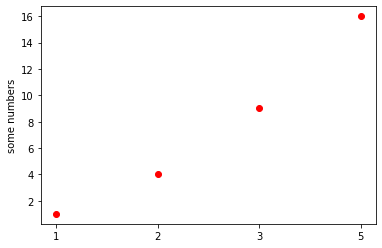

In [6]:
plt.plot(['1', '2', '3', '5'], [1, 4, 9, 16], 'ro')
plt.ylabel('some numbers')
plt.show()

In [67]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime

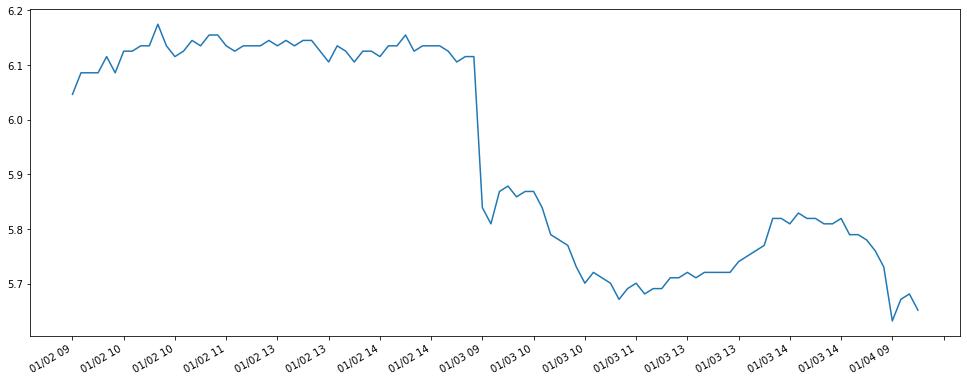

In [114]:
fig, ax = plt.subplots(figsize=(1200/72,480/72))

tm = dt_df.index[99]
ydata = dt_df.loc[:tm,'close'].values
xdata = np.arange(len(ydata))

# format the ticks
tmLabel = dt_df.loc[:tm,'close'].index
x_fmt = [x.strftime("%m/%d %H") for x in tmLabel]

def format_date(x,pos=None):   
    x = int(x)
    if x<0 or x>len(x_fmt)-1:
        return ''
    return x_fmt[x]

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))


ax.plot(xdata,ydata)
fig.autofmt_xdate()
plt.show()

In [55]:
#dt_df.loc[:'1/3/2020', 'close']
#dt_df.loc[:datetime(2020,1,3), 'close']

In [59]:
pd.core.index

<module 'pandas.core.index' from 'd:\\Users\\zhangyun29\\AppData\\Local\\Programs\\Python\\Python36-64\\lib\\site-packages\\pandas\\core\\index.py'>

In [38]:
def verify_end_to_end(lv_L):
    # peak with start
    dd = [[st1.start.TmIdx, st1.peak, st2.start] for st1,st2 in zip(lv_L[:-2], lv_L[1:]) if st1.peak.TmIdx != st2.start.TmIdx]
    if len(dd) == 0:
        return True
    else:
        return dd

In [27]:
def verity_valley_after_peak(lv_L):
    return True

In [39]:
verify_end_to_end(m.Lv1_L)

[[177.0, Point(192.0, 22.32, -1), Point(191.0, 22.26, 1)],
 [1668.0, Point(1679.0, 22.23, 1), Point(1676.0, 22.3, -1)],
 [1709.0, Point(1712.0, 21.74, -1), Point(1731.0, 21.68, -1)],
 [1946.0, Point(1949.0, 21.79, 1), Point(1968.0, 21.83, 1)],
 [1968.0, Point(1975.0, 21.85, 1), Point(1977.0, 21.95, -1)],
 [2464.0, Point(2504.0, 22.35, -1), Point(2491.0, 22.44, -1)],
 [2583.0, Point(2592.0, 22.15, -1), Point(2615.0, 22.15, -1)],
 [2792.0, Point(2803.0, 22.09, 1), Point(2851.0, 22.12, 1)],
 [2851.0, Point(2882.0, 22.18, -1), Point(2865.0, 22.26, -1)],
 [2865.0, Point(2873.0, 22.19, -1), Point(2884.0, 22.02, 1)],
 [3931.0, Point(3970.0, 22.71, 1), Point(3954.0, 22.63, 1)],
 [4589.0, Point(4594.0, 23.31, -1), Point(4596.0, 23.22, 1)],
 [5306.0, Point(5311.0, 24.3, 1), Point(5310.0, 24.34, -1)],
 [5364.0, Point(5373.0, 24.35, -1), Point(5371.0, 24.19, 1)],
 [5371.0, Point(5400.0, 24.39, -1), Point(5382.0, 24.44, -1)],
 [5382.0, Point(5393.0, 24.4, -1), Point(5399.0, 24.3, 1)],
 [5532.0, Poi

### Trend Analysis

In [ ]:
dd = [[st.start.TmIdx, st.start.V, st.drt,st.peak.TmIdx, st.end.TmIdx,st.peak.TmIdx - st.start.TmIdx, 
      len(st.ES_stack), st.mp, st.mp[0]] for st in m.Lv1_L]

In [ ]:
df_out = pd.DataFrame(dd)
df_out.columns = ['TmS','start','drt', 'TmP', 'TmE', 'T', 'ES', 'mp', 'mp0']
df_out['A'] = -df_out.start.diff(-1)
df_out['st_cnt'] = -df_out.mp0.diff(-1)

In [ ]:
df_out.to_excel('data_csv\\lv1.xlsx')

In [ ]:
df_out.A.abs().quantile([.1, .15, .25,.5, .75,.85,.9])

In [ ]:
df_out.A.abs().mean()

In [ ]:
ss = df_out['A'].tolist()
ss.append(np.nan)
ss.append(np.nan)
df_out.loc[:,'A_next2'] = ss[2:]
df_out.loc[:,'A_next'] = ss[1:-1]

In [ ]:
df_out.head()

In [ ]:
df_out.loc[df_out['A']>0.5, [ 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.loc[df_out['A']>0.7, ['A_next', 'A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6').A_next2.quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

In [ ]:
df_out.query('A>0.7 and A_next<-0.6 and A > -A_next')

In [ ]:
df_out.loc[df_out['A']>0.3, [ 'A_next','A_next2']].quantile([.1, .15, .25,.3, .35,.4,.45,.5,.6, .7, .75,.8, .85,.9])

### 快照

In [36]:
tmIdx = 15929


In [33]:
# find Lv
def find_lv(tmIdx, level):
    global m
    lv_idx = [st.start.TmIdx for st in m.findList('st', level)]
    lv = m.findList('st', level)
    
    i = 0
    for tm in lv_idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i,lv[i]

In [37]:
find_lv(tmIdx,0), find_lv(tmIdx, 1),find_lv(tmIdx, 2)

((1904, Stick(drt:1, lv:0, Point(15927.0, 33.11, 1))),
 (392, Trend1(1, 2, Point(15927.0, 33.11, 1))),
 (86, Trend2(1, 2, Point(15927.0, 33.11, 1))))

In [35]:
# find Pair
def find_pair(tmIdx, level):
    global m
    idx = [p.TmS for p in m.findList('pair', level)]
    ll = m.findList('pair', level)
    
    i = 0
    for tm in idx[1:]:
        if tmIdx >= tm:
            i += 1
        else:
            break
    return i, ll[i]

In [ ]:
find_pair(tmIdx, 1).__dict__

In [ ]:
lv[0].__dict__

In [ ]:
m.Lv0_L[7]

In [ ]:
m.Lv1_L[3]

In [ ]:
m.Lv1_L[292].peak,m.Lv1_L[292],m.Lv1_L[292].end

In [ ]:
m.Lv0_L[3].__dict__

In [ ]:
len(m.PLv1_L)

In [ ]:
len(m.position)

In [ ]:
dd = [[op.drt,op.TmSig, op.TmOp, op.openV,op.pattern, op.pattern_objs] for op in m.position]

In [ ]:
df = pd.DataFrame(dd)

df.to_excel('position.xlsx')

In [ ]:
m.PCLv0_L[0].cL

In [ ]:
# print Pair list
dd = m.PLv1_L[1].calFeatures()
dd['TmS'] = []
dd['chain_layer'] = []
dd['index'] = []
dd['S'] =[]
dd['P'] = []
for k in dd.keys():
    dd[k] = []
for p in m.PLv1_L:
    print(p)
    r = p.calFeatures()
    r['TmS'] = p.TmS
    r['chain_layer'] = p.chain_layer
    r['index'] = p.index
    r['S'] = p.S
    r['P'] = p.P
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df = df[['TmS','chain_layer',  'index', 'drt','is_flag','cl', 'ch', 'a','k','c_c_level', 'c_drt'
         ,'S', 'P',  'b_tm', 'b_w', 'c_a',  'cc',
        'p_v', 's_tm', 's_v']]
df.to_excel('PairLv1.xlsx')

In [ ]:
[p.index for p in m.PLv1_L]

In [ ]:
[st.distr() for st in m.Lv1_L[5].stick_stack]

In [ ]:
m.Lv1_L[1].stick_stack[0]

In [ ]:
m.Lv1_L[1].stick_stack[0].peak

In [ ]:
m.Lv1_L[1].stick_stack[0].distr()

In [ ]:
l = [[st.drt,st.amp()[0], st.amp()[1]] for st in m.Lv1_L]
df = pd.DataFrame(l)
df.to_excel('00lv_amp_by_st.xlsx')

In [ ]:
tt = [list(st.distr()[0]) + list(st.distr()[1]) for st in m.Lv0_L[132:135]]
tt_df = pd.DataFrame(tt)
tt_df.to_excel('stdistr.xlsx')

In [ ]:
x = m.PLv0_L[15].calFeatures()
op = Operator(x,3,'pair_drt')
op2 = Operator(x,0.5,'concentrated')
r = Node([op,op2],1)
r.do()

In [ ]:
EventFactory.event_config

In [ ]:
m.findList('pair',0).__name__

In [ ]:
d = {'level_num':0, 'obj_name': 'Stick', 'event_name':'NEW', 'obj_p':'m.position[0]', 'method':'check_event', 'param':''}
EventFactory.reg_event(d)

In [ ]:
EventFactory.remove_event(d)

In [ ]:
# print Pair Lv0
dd = m.PLv0_L[5].output()
for k in dd.keys():
    dd[k] = []
for p in m.PLv0_L:
    r = p.output()
    for k in r.keys():
        dd[k].append(r[k])
df = pd.DataFrame(dd)
df.to_excel('pair0.xlsx')

In [ ]:
# 把Lv0打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V] for st in m.Lv0_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv0_L.xlsx')

In [ ]:
# 把Lv1打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv1_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv1_L.xlsx')

In [ ]:
# 把Lv2打印出来
dd = [[st.drt,st.start.TmIdx,st.start.V,st.peak.TmIdx, st.peak.V,st.pp,st.mp] for st in m.Lv2_L]
df_dd = pd.DataFrame(dd)
df_dd.to_excel('Lv2_L.xlsx')

In [ ]:
st = m.Lv0_L[3]
k_L = [[k[1],k[2]] for k in dt if k[4]>= st.start.TmIdx and k[4]<= st.peak.TmIdx]

interval = (st.peak.V - st.start.V)*st.drt/ 20
L = min(st.peak.V, st.start.V)
H = max(st.peak.V, st.start.V)
scale = [L]
for i in list(range(1,20)):
    scale.append(scale[i-1]+interval)
scale.append(H)

distr = np.zeros(20)
for k in k_L:
    distr_k = np.zeros(20)
    for i in list(range(20)):
        if (min(k) <= scale[i] <= max(k)) or (min(k) <= scale[i+1] <= max(k)):
            distr_k[i] = 1
    cnt = distr_k.sum()
    distr_k = distr_k/cnt
    distr = distr + distr_k
distr, distr.argmax()

In [ ]:
ll = np.zeros(20)
ll[2:4] = 1
cnt = ll.sum()
ll = ll/cnt

ll2 = np.ones(20)
lr = ll +ll2
lr

In [ ]:
a = [1,2,3]
a[:-1]

### draw and verified

In [ ]:
data = {
    'times': x['TmIdx'],
    'data': 
}

In [94]:
# 绘图用插值函数
# input: 
#       1 - TmIdx array 
#       2 - Values array
# output: 按x轴查完值的value array
def interpoint(TmIdx_array, V_array):
    global x
    x['TmIdx'].astype('int64')
    print(len(x))
    df_tmp = pd.DataFrame({'V': V_array, 'TmIdx': TmIdx_array})
    df_tmp['TmIdx'].astype('int64')
    start_tm = int(TmIdx_array[0])
    end_tm = int(TmIdx_array[-1]) +1
    df_tmp = df_tmp.merge(x.iloc[start_tm:end_tm,:], how='right', left_on='TmIdx', right_on='TmIdx')
    df_tmp.sort_values(['TmIdx'], inplace=True)
    df_tmp['V'].interpolate(inplace=True)
    return df_tmp['V'].values.tolist(), df_tmp[['TmIdx','V']]

In [ ]:
def draw(lv_list):
    global dt, interpoint
    x_idx = [k[4] for k in dt]
    oringe_dt = [[k[0], k[3], k[2], k[1]] for k in dt]

    n = len(lv_list)
    drawing_line = []
    
    for i in list(range(n)):
        tm, v = [], []
        for stick in lv_list[i]:
            tm.append(stick.start.TmIdx)
            v.append(stick.start.V)
        dt_line = interpoint(tm,v)
        line = Line('stick')
        line.add('xxx', [k[4] for k in dt], dt_line
        ,is_datazoom_show=True
        )  
        drawing_line.append(line)
        
    overlap = Overlap()
    for line in drawing_line:
        overlap.add(line)
    
    return overlap
            

In [ ]:
draw([Stick.lv_L, TrendLv1.lv_L, TrendLv2.lv_L])

### 定点k-line

In [31]:
def draw_k(center_point, half_window, stock_name='xxx'):
    line = Kline('stick')
    global dt, x
    
    dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()
    dt_tmp = [dd[:4] for dd in dt[center_point - half_window//2:center_point + half_window//2 ]]
    dt_line = [[k[0], k[3], k[2], k[1]] for k in dt_tmp]
    line.add(stock_name, dt_x, dt_line)  
    return line


In [32]:
draw_k(15027,500)

AttributeError: 'str' object has no attribute 'get'

In [ ]:
line = (Line()
       .add_yaxis()
       )

In [102]:
_,p_df = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


### draw Pair

In [105]:
p = find_pair(tmIdx,0)[1]
p.__dict__

{'P': 33.61,
 'S': 33.11,
 'TmS': 15927.0,
 'cc': 0.55,
 'ccHL': (7, 18, 33.28499999999999, 33.559999999999974),
 'chain_layer': 2,
 'core': 33.50999999999998,
 'core_index': 16,
 'drt': 1,
 'his': [[33.11,
   33.135,
   33.16,
   33.184999999999995,
   33.209999999999994,
   33.23499999999999,
   33.25999999999999,
   33.28499999999999,
   33.30999999999999,
   33.33499999999999,
   33.359999999999985,
   33.384999999999984,
   33.40999999999998,
   33.43499999999998,
   33.45999999999998,
   33.48499999999998,
   33.50999999999998,
   33.534999999999975,
   33.559999999999974,
   33.58499999999997,
   33.61],
  array([0.2       , 0.53333333, 0.53333333, 0.78333333, 0.45      ,
         0.25      , 0.45      , 0.2       , 0.2       , 0.2       ,
         0.84285714, 1.04285714, 0.54285714, 0.34285714, 0.25396825,
         0.97619048, 1.33730159, 0.69444444, 0.69444444, 0.47222222])],
 'index': [1904, 1905],
 'status': 1}

In [186]:
level = 1
center_point = tmIdx
half_window = 15
start = int(center_point - half_window)
end = int(center_point + half_window)
dt_x = x.iloc[center_point - half_window//2:center_point + half_window//2,2].values.tolist()

In [187]:
point1 = m.findList('st',level-1)[p.index[0]].start
point1

Point(15927.0, 33.11, 1)

In [188]:
point2 = m.findList('st',level-1)[p.index[-1]].peak
point2

Point(15936.0, 33.36, 1)

In [189]:
_,df_p = interpoint([int(point1.TmIdx), int(point2.TmIdx)], [point1.V, point2.V])

17124


In [190]:
df_draw = x.iloc[start:end,].copy()
df_draw = df_draw.merge(df_p, how='left', left_on='TmIdx', right_on='TmIdx')
df_draw = df_draw.merge(dt_df[['open','high','low','close','TmIdx']], how='left', left_on='TmIdx', right_on='TmIdx')
df_draw.query('TmIdx>15900 and TmIdx<15940')

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,NaN,NaN,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,NaN,NaN,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,NaN,NaN,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,NaN,NaN,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,NaN,NaN,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,NaN,NaN,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,NaN,NaN,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,NaN,NaN,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,NaN,NaN,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,NaN,NaN,33.25,33.36,33.23,33.25


In [191]:
df_p

,TmIdx,V
0,15927,33.110000
2,15928,33.137778
3,15929,33.165556
4,15930,33.193333
5,15931,33.221111
6,15932,33.248889
7,15933,33.276667
8,15934,33.304444
9,15935,33.332222
1,15936,33.360000


In [193]:
df_draw.fillna('', inplace=True)
df_draw

,datetime,TmIdx,date_str,internal,mark,V,open,high,low,close
0,2020-02-12 10:45:00,15914,02-12 10:45,60.0,,,33.19,33.19,32.85,32.91
1,2020-02-12 10:46:00,15915,02-12 10:46,60.0,,,32.86,33.05,32.82,33.05
2,2020-02-12 10:47:00,15916,02-12 10:47,60.0,,,33.02,33.13,33.02,33.09
3,2020-02-12 10:48:00,15917,02-12 10:48,60.0,,,33.10,33.12,33.07,33.09
4,2020-02-12 10:49:00,15918,02-12 10:49,60.0,,,33.10,33.20,33.06,33.19
5,2020-02-12 10:50:00,15919,02-12 10:50,60.0,,,33.14,33.28,33.10,33.27
6,2020-02-12 10:51:00,15920,02-12 10:51,60.0,,,33.21,33.29,33.20,33.28
7,2020-02-12 10:52:00,15921,02-12 10:52,60.0,,,33.28,33.33,33.21,33.33
8,2020-02-12 10:53:00,15922,02-12 10:53,60.0,,,33.31,33.37,33.23,33.27
9,2020-02-12 10:54:00,15923,02-12 10:54,60.0,,,33.25,33.36,33.23,33.25


In [201]:
import pyecharts.options as opts
COLOR = ['red', 'yellow', 'green']

In [198]:
kl = (Kline()
      .add_xaxis(df_draw.date_str.tolist())
      .add_yaxis('pair', df_draw[['open','close','low','high']].values.tolist())
)
kl.render_notebook()

In [199]:
l = (
    Line()
    .add_xaxis(df_draw.date_str.tolist())
    .add_yaxis("pair"
               , df_draw.V.tolist()
               ,is_symbol_show = False
               .linestyle_opts = opts.LineStyleOpts(color=color[level], width=4, opacity=0.6)
               
              )
)
l.render_notebook()

In [200]:
kl.overlap(l).render_notebook()

In [ ]:
find_pair(14952,1)[1].__dict__

In [ ]:
draw_k(16027,500)

In [ ]:
x.loc[x['TmIdx']==14705,'datetime']

In [ ]:
x.loc[x['datetime']=='2020-02-06 14:00','TmIdx']

### draw scene

In [ ]:
m.Lv0_L[0]

In [ ]:
m.Lv1_L[2]

In [ ]:
m.findList('st', 0)[2]

In [ ]:
Lv2_idx = [st.start.TmIdx for st in m.Lv2_L]

In [ ]:
Lv2_idx = []
Lv2_idx = [st.start.TmIdx for st in m.findList('st', 2)]

In [ ]:
Lv2_idx[:10]

In [ ]:
def find_index(ll, num):
    i = 0
    for n in ll[1:]:
        if num >= n:
            i += 1
        else:
            break
    return i

        
Lv2_idx.index(440)

In [ ]:
idx = find_index(Lv2_idx, 9508)

In [ ]:
m.Lv2_L[idx].drt, m.Lv2_L[idx].start, m.Lv2_L[idx+1].start

In [ ]:
idx

In [ ]:
len(m.Lv2_L)

In [ ]:
i =0
for st in m.Lv2_L:
    print(i, st.start,st.pp)
    i += 1

In [ ]:
m.Lv2_L[66].stick_stack, m.Lv2_L[66].mp

In [ ]:
m.Lv2_L[67].stick_stack, m.Lv2_L[67].mp, m.Lv2_L[67].status

In [ ]:
CenterStrict(Stick.lv_L[1:], market)

In [ ]:
for c in market.CenterStrict_LD[10]:
    print(c)

In [ ]:
a = [1,2,3,4,9]
l = [1,2,3,4,9]
for aa,ll in zip(*[a,l]):
    print(aa,ll)

In [ ]:
m.__class__.__name__

In [ ]:
a = []
a.append([])
a.append([])
a.append([])

In [ ]:
a

In [ ]:
tmp = type('Xb', (object,), dict(a=1))
tmp = type('Xa', (object,), dict(a=1))

In [ ]:
a = [1,2,3]
b = [3,4,5]
for aa in a [1:
             :-1]:
    print(aa)

In [ ]:
d1 = {'a': 1}
d2 = {'b': 2}

In [ ]:
d1.append(d2)